# Miniscule sample of production code
---
This notebook is mainly used as a sandbox and to visualize results of code fragments before adding them to the production pipeline

<br>
<hr>
<br>

<a id='toc'></a>
### Table of Contents
[1. Convert PDFs to images](#section-1)<br>
[2. Use PyTesseract for page segmentation](#section-2)<br>
[3. Image preprocessing](#section-3)<br>
[4. Text extraction using OCR](#section-4)<br>

<br>
<hr>

<a id='section-1'></a>
### - Convert PDFs to images

In [58]:
# Loading dependencies
from pdf2image import convert_from_path
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

In [61]:
# Start converting pdf pages into separate images
pages = convert_from_path('../PDFs/US20190030051.pdf', dpi=600, fmt='tiff',
                         output_folder='./sandbox/images/pdf_to_img')

<hr>
<br>

<a id='section-2'></a>

### - Use PyTesseract for page segmentation

In [4]:
# Loading dependencies
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob

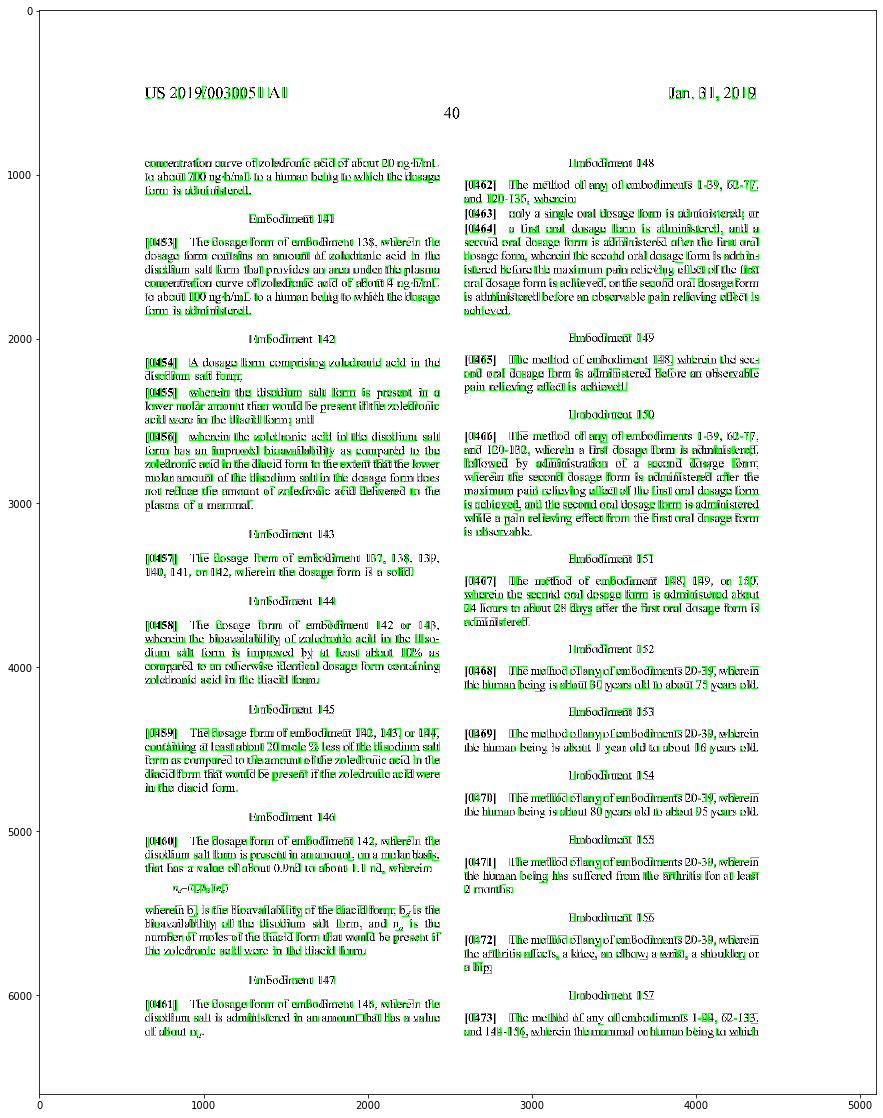

In [6]:
# Loop through all images in the folder
for image in glob.glob('./sandbox/images/pdf_to_img/*.tif'):
    # Read the image and get the dimensions
    img = cv2.imread(image)
    h, w, _ = img.shape

    # Run tesseract method to get bounding boxes around recognized characters
    boxes = pytesseract.image_to_boxes(
        Image.open(image))

    # Draw the bounding boxes on the image
    for b in boxes.splitlines():
        b = b.split(' ')
        img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

    # Save image with bounding boxes
    plt.imsave('./sandbox/images/img_segmentation/' + image[27:-3] + 'jpg', img)
    
# Show page with bounding boxes
fig = plt.figure(figsize = (15,30))
plt.imshow(img)
plt.show()

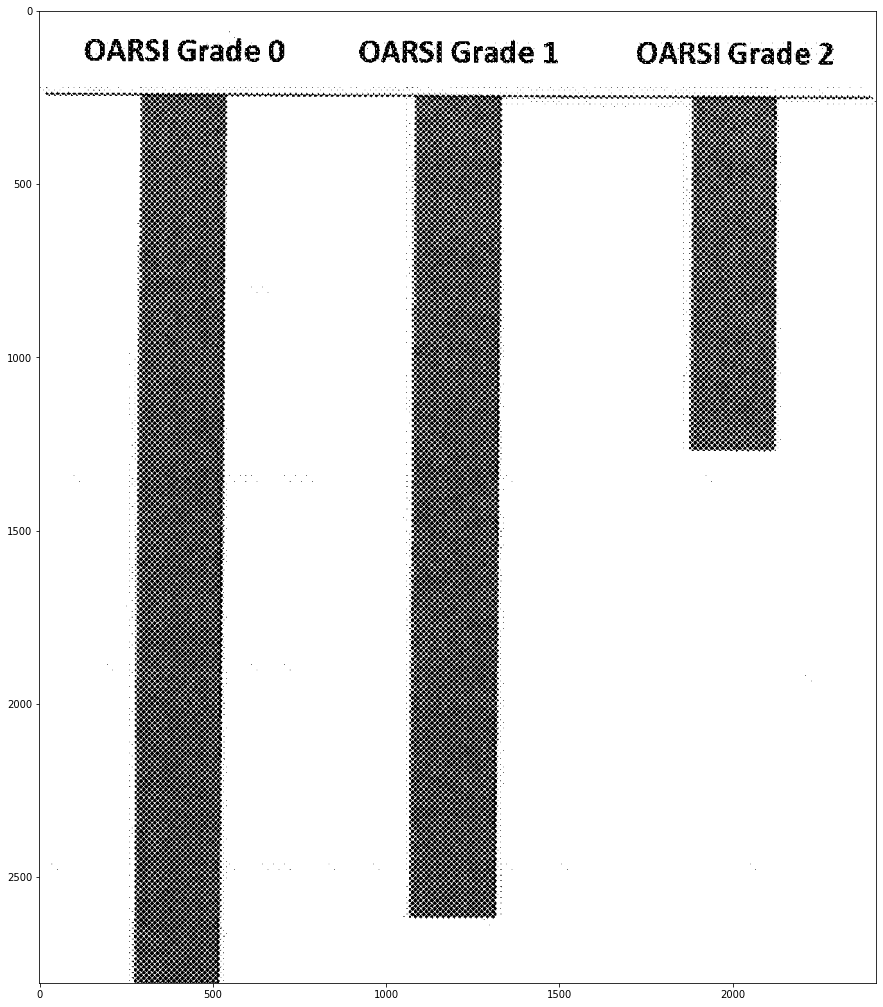

In [9]:
# Loop through all images in the folder
for image in glob.glob('./sandbox/images/pdf_to_img/*.tif'):
    
    # Read the image and get the dimensions
    img2 = cv2.imread(image)
    h, w, _ = img2.shape

    # Run tesseract method to get bounding boxes around recognized characters
    boxes = pytesseract.image_to_boxes(
        Image.open(image))

    # Loop through all bounding boxes
    for b in boxes.splitlines():
        b = b.split(' ')
        
        # Extract figures from a page and save them
        images = []
    
        # Check for dimensions of bound box, if they exceed 800px for width and height
        # consider the box containing a figure and crop it out
        if (int(b[3]) - int(b[1]) > 800) and ((h - int(b[2])) - (h - int(b[4])) > 800):
            images.append([int(b[2]), int(b[4]), int(b[1]), int(b[3])])
            crop = img2[images[0][0]:images[0][1], images[0][2]:images[0][3]]
            plt.imsave('./sandbox/images/figure_extraction/' + image[27:-3] + 'jpg', crop)

# Show extracted figure
fig2 = plt.figure(figsize = (15,30))
plt.imshow(crop)
plt.show()

<hr>
<br>

<a id='section-3'></a>

### - Image preprocessing

In [11]:
# Loading dependencies

import glob
import os
from PIL import Image
import cv2 as cv
import numpy as np

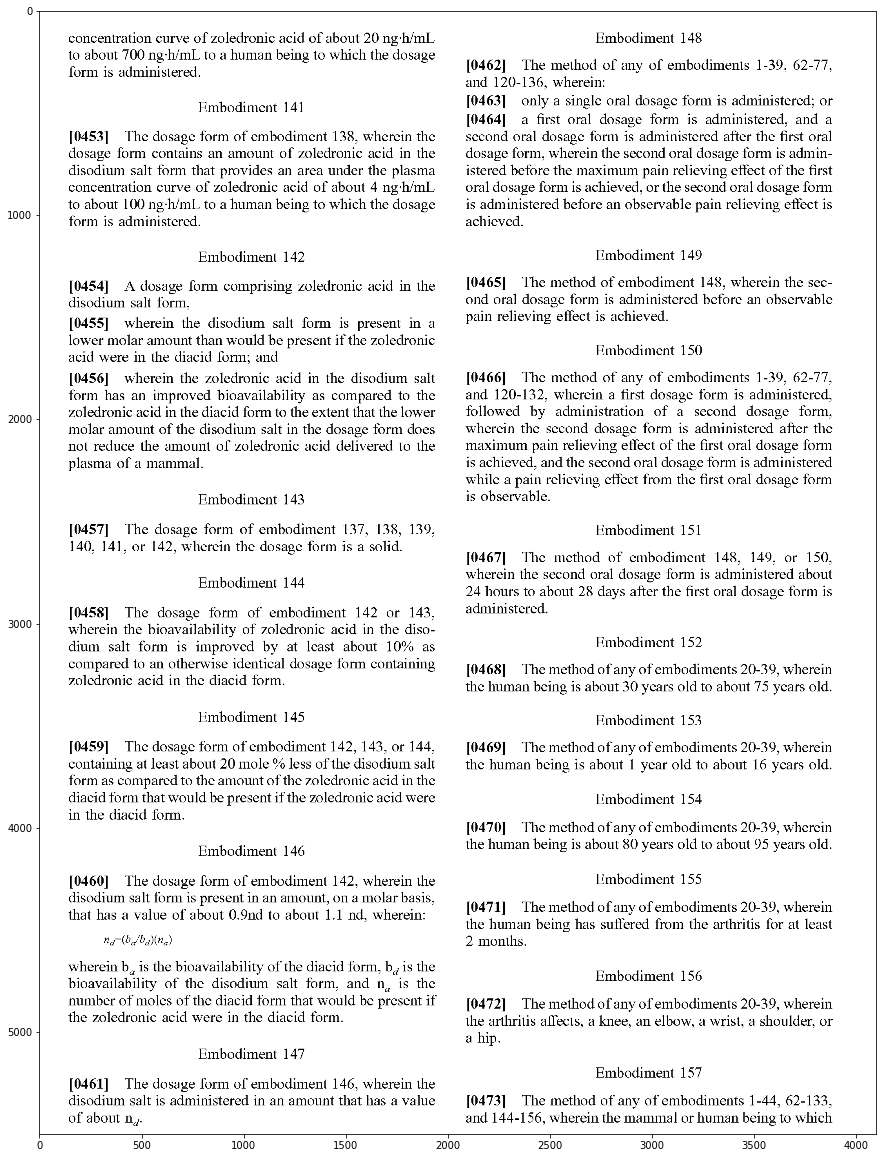

In [12]:
# Loop through all images in the folder
for image in glob.glob('./sandbox/images/pdf_to_img/*.tif'):

    # Apply thresholding to increase constrast of black characters
    # and increase tesseract reading accuracy
    img3 = cv.imread(image, 0)
    ret, thresh1 = cv.threshold(img3, 127, 255, cv.THRESH_BINARY)

    # Crop header and footer of each page and
    # remove white borders on the sides
    crop_img = img3[800:6300, 500:4600]

    # Change color space to be compatible with the format to save
    crop_img = cv.cvtColor(crop_img, cv.COLOR_BGR2RGB)

    # Save images of the current document
    cv.imwrite('./sandbox/images/img_preprocessing/' + image[28:-3] + 'ppm', crop_img)

# Show preprocessed image
fig3 = plt.figure(figsize = (15,30))
plt.imshow(crop_img)
plt.show()

<hr>
<br>

<a id='section-4'></a>

### - Text extraction using OCR

In [3]:
# Loading dependencies
import glob
import os
from PIL import Image
import pytesseract

In [ ]:
# Use pytesseract to extract text from images (scans) of documents
text_array = []

# Loop through all pages for a patent
for image in glob.glob('./sandbox/images/img_preprocessing/*.ppm'):
    print('Reading from image', image[-6:-4])
    text_array.insert(0, pytesseract.image_to_string(Image.open(image)))

# Convert array items to string
text = ''.join(text_array)

# Write to text file
with open('./sandbox/text/raw/patent.txt', 'w') as text_file:
    text_file.write(text)

print(text)

Reading from image 36
Reading from image 22
Reading from image 23
Reading from image 37
Reading from image 21
Reading from image 35
Reading from image 09
Reading from image 08
Reading from image 34
Reading from image 20
Reading from image 18
Reading from image 24
Reading from image 30
Reading from image 31
Reading from image 25
Reading from image 19
Reading from image 33
Reading from image 27
Reading from image 26
Reading from image 32
Reading from image 55
Reading from image 41
Reading from image 69
Reading from image 68
Reading from image 40
Reading from image 54
Reading from image 42
Reading from image 56
Reading from image 57
Reading from image 43
Reading from image 47
Reading from image 53
Reading from image 52
Reading from image 46
Reading from image 50
Reading from image 44
Reading from image 45
Reading from image 51
Reading from image 60
Reading from image 48
Reading from image 49
Reading from image 61
Reading from image 63
Reading from image 62
Reading from image 66
